In [1]:
import nltk
# python -m nltk.downloader all  ##type this on command line to download required nltk documents

In [163]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import os
os.chdir("D:/PlayGround/NLP/")

In [3]:
df_init = pd.read_excel('keyword_grouping.xlsx')

In [4]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 2 columns):
Keyword            6553 non-null object
Refined Keyword    3391 non-null object
dtypes: object(2)
memory usage: 102.5+ KB


In [5]:
df_init[:5]

,Keyword,Refined Keyword
0,0_4da850ed6c-18e2076de5-99212033,NaN
1,0_5f41bbf30e-9fad566447-,NaN
2,0_161dc7017d-fb01084e85-186735817,NaN
3,0_161dc7017d-fb01084e85-186735837,NaN
4,0_161dc7017d-fb01084e85-186735845,NaN


In [6]:
keywords = df_init['Refined Keyword'].value_counts()

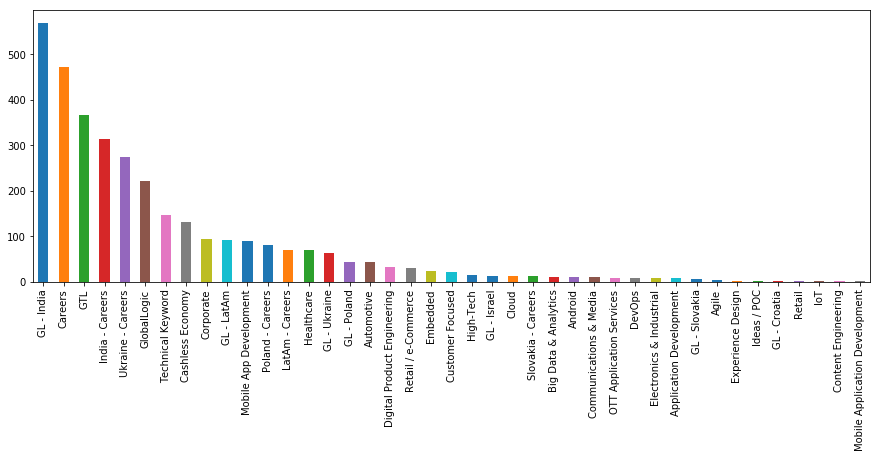

In [9]:
keywords.plot(kind = 'bar', figsize = (15,5))

In [11]:
df_init['Keyword'].nunique()

6553

In [12]:
df = df_init.copy()

In [13]:
# Remove NaN/Empty
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3391 entries, 77 to 6553
Data columns (total 2 columns):
Keyword            3391 non-null object
Refined Keyword    3391 non-null object
dtypes: object(2)
memory usage: 79.5+ KB


In [15]:
# checking if keyword has non-english characters. 0 means no non-english chars.
df['non_eng'] = 0

In [35]:
# function to detect language
def detect_language(line):
    maxchar = max(line)
    # print(maxchar,ord(maxchar))
    if ord(maxchar)>127:
        return 1
    else:
        return 0

In [36]:
for index,row in df.iterrows():
    df['non_eng'][index] = detect_language(row['Keyword'])

In [37]:
df['non_eng'].value_counts()

0    3310
1      81
Name: non_eng, dtype: int64

In [38]:
df[:5]

,Keyword,Refined Keyword,non_eng
77,1mobile market,Mobile App Development,0
78,2 2 channel ukraine,GL - Ukraine,0
79,5 ETAPAS DE BPMN,Technical Keyword,0
80,5 ETAPAS DEL BPMN,Technical Keyword,0
81,5 g live mobile,Mobile App Development,0


In [63]:
# function to split urls
def split_url(line):
    import re
    words = re.split('\:|\/|, |\.|\n|\>|\<|\-|\@',line)
    non_empty = []
    for word in words:
        if len(word)>0:
            non_empty.append(word)
    return ' '.join(non_empty)

In [61]:
# converting urls to string of space separated words
for index, row in df.iterrows():
    df['Keyword'][index] = split_url(str(row['Keyword']))
# split_url('<http://www.globallogic.com/>')

In [39]:
# - *- coding: utf- 8 - *-

In [40]:
# detecting language in the text.
# Adding new language column and setting values to english.
df['lang'] = 'en'

In [62]:
# detecting language of the keywords

from langdetect import detect
for index, row in df.iterrows():
    try:
        df['lang'][index] = detect(row['Keyword'])
    except:
        print(row)

Keyword            career@globallogic
Refined Keyword               Careers
non_eng                             0
lang                               en
Name: 444, dtype: object


In [65]:
df['Keyword'][444]='career globallogic'

In [66]:
df['lang'][444] = detect('career globallogic')

In [74]:
df[:5]

,Keyword,Refined Keyword,non_eng,lang
77,1mobile market,Mobile App Development,0,tr
78,2 2 channel ukraine,GL - Ukraine,0,de
79,5 ETAPAS DE BPMN,Technical Keyword,0,de
80,5 ETAPAS DEL BPMN,Technical Keyword,0,de
81,5 g live mobile,Mobile App Development,0,sl


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3391 entries, 77 to 6553
Data columns (total 4 columns):
Keyword            3391 non-null object
Refined Keyword    3391 non-null object
non_eng            3391 non-null object
lang               3391 non-null object
dtypes: object(4)
memory usage: 292.5+ KB


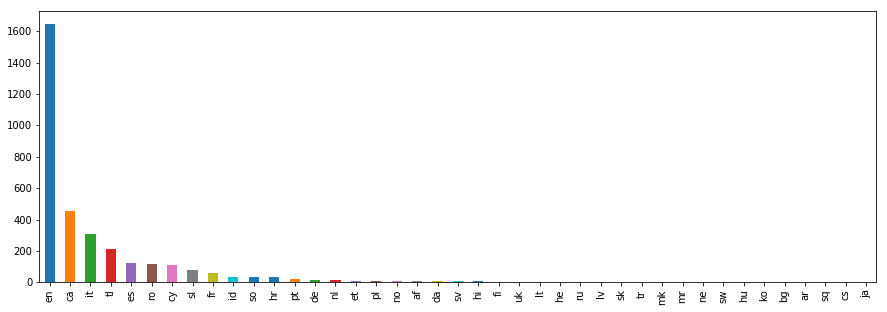

In [70]:
df['lang'].value_counts().plot(kind = 'bar', figsize=(15, 5))

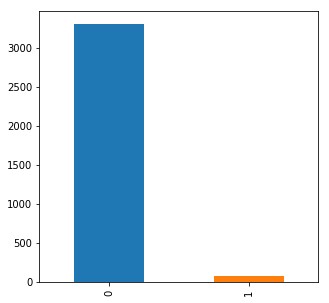

In [73]:
df['non_eng'].value_counts().plot(kind = 'bar', figsize=(5, 5))

In [81]:
# separating df with only english characters
df_eng = df[df['non_eng']==0]

In [88]:
df_eng['lang'].value_counts()[:5]

en    1643
ca     446
it     306
tl     215
ro     118
Name: lang, dtype: int64

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(df_eng['Keyword'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [83]:
# transform the data using count vectorizer object
keyword_feature_matrix =  count_vect.transform(df_eng['Keyword'])

In [84]:
keyword_feature_matrix.shape

(3310, 2365)

In [89]:
features = count_vect.get_feature_names()

In [90]:
tokenize_df = pd.DataFrame(keyword_feature_matrix.toarray(), columns = features)

In [91]:
tokenize_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Columns: 2365 entries, 003 to zppakode
dtypes: int64(2365)
memory usage: 59.7 MB


In [92]:
tokenize_df[:5]

,003,005,0221210211,08,09,0b19a637cc,0h9ms5fxgtkj,10,1042,10698,...,you,your,youtube,zaheel,zaheer,zautejbno1qj,zift,zillonlife,zinnov,zppakode
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
tokenize_df['label'] = df_eng['Refined Keyword'].tolist()

In [94]:
tokenize_df['label'].nunique()

41

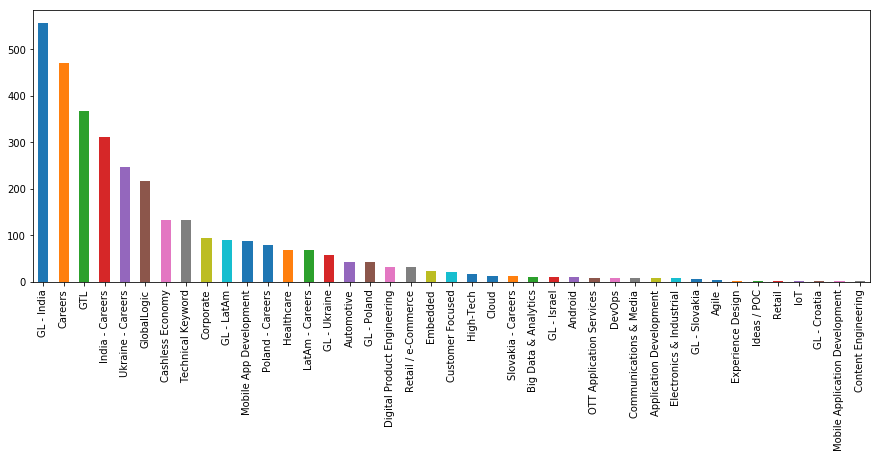

In [121]:
tokenize_df['label'].value_counts().plot(kind = 'bar', figsize = (15,5))

In [97]:
tokenize_df['label'].isna().sum()

0

In [98]:
tokenize_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Columns: 2366 entries, 003 to label
dtypes: int64(2365), object(1)
memory usage: 59.7+ MB


In [99]:
tokenize_df[:5]

,003,005,0221210211,08,09,0b19a637cc,0h9ms5fxgtkj,10,1042,10698,...,your,youtube,zaheel,zaheer,zautejbno1qj,zift,zillonlife,zinnov,zppakode,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mobile App Development
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GL - Ukraine
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Technical Keyword
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Technical Keyword
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mobile App Development


In [112]:
tokenize_df['003'].value_counts()

0    3309
1       1
Name: 003, dtype: int64

In [113]:
# no of rows where each feature exists
feat_total = []
for feat in features:
    feat_sum = tokenize_df[feat].sum()
    feat_total.append([feat, feat_sum])

In [116]:
feat_total_df = pd.DataFrame(feat_total, columns=['Feature', 'Occurance'])

In [122]:
feat_total_df.sort_values('Occurance', ascending=False)[:10]

,Feature,Occurance
939,globallogic,1392
930,global,838
468,com,833
2344,www,790
1067,https,778
1440,logic,747
1107,in,506
1584,nagpur,429
1115,india,369
893,gl_career,280


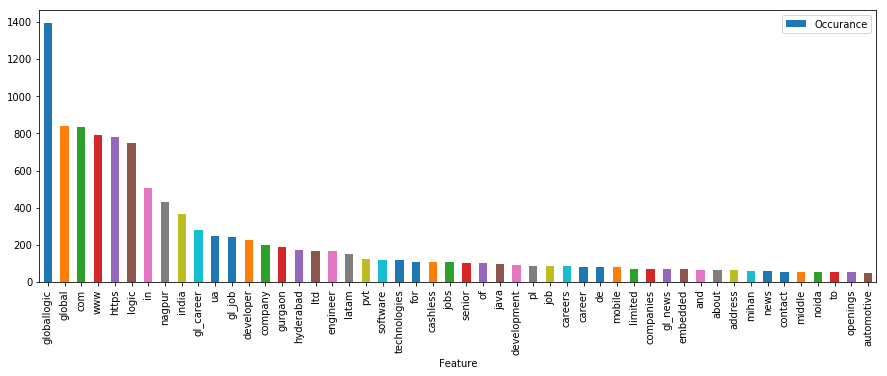

In [132]:
feat_total_df.sort_values('Occurance', ascending=False)[:50].plot.bar(y='Occurance', x='Feature', figsize=(15,5))

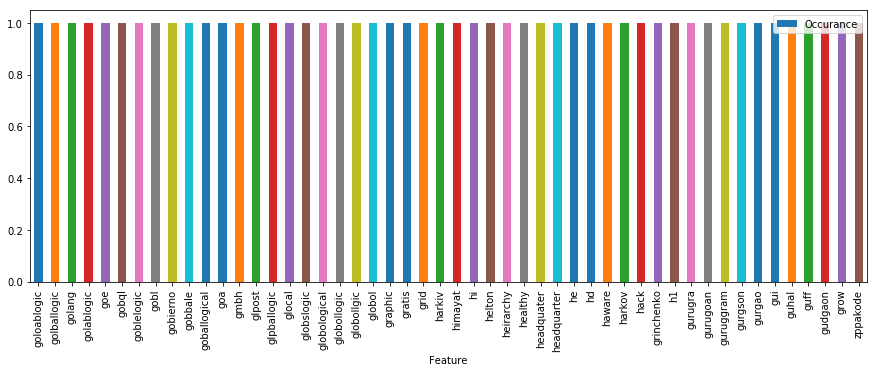

In [134]:
feat_total_df.sort_values('Occurance', ascending=False)[-50:].plot.bar(y='Occurance', x='Feature', figsize=(15,5))

In [137]:
# Total features
feat_total_df.shape[0]

2365

In [136]:
# no of words occuring only 1 time
feat_total_df[feat_total_df['Occurance']==1].shape[0]

1472

In [138]:
# no of words occuring less than or equal to 5 times
feat_total_df[feat_total_df['Occurance']<=5].shape[0]

2062

In [141]:
# no of words occuring less than 10 times
feat_total_df[feat_total_df['Occurance']<10].shape[0]

2155

In [142]:
# no of words occuring more than or equal to 10 times
feat_total_df[feat_total_df['Occurance']>=10].shape[0]

210

# Modeling Feature Vectors using various classification algorithms

In [185]:
# creating train and test dataset randomly
import numpy as np
msk = np.random.rand(len(tokenize_df)) <= 0.8
train_df = tokenize_df[msk]
test_df = tokenize_df[~msk]
len(train_df), len(test_df)

(2643, 667)

In [154]:
x_col = features     # x_col : Features

y_col = ['label'] # y_col : Target Variable

train_x = train_df[x_col]
train_y = train_df[y_col]
test_x = test_df[x_col]
test_y = test_df[y_col]

In [158]:
train_y['label'].nunique(),test_y['label'].nunique()

(40, 35)

In [161]:
# Creating a accuracy function:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    from sklearn.metrics import accuracy_score
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return accuracy_score(predictions, test_y)

# Naive Bayes

In [168]:
# using sklearn's multinomial naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
accuracy_nb = train_model(MultinomialNB(), train_x, train_y, test_x)
print('NB accuracy : ' , accuracy_nb)

NB accuracy :  0.6341829085457271


# Linear Classifier

In [179]:
# Linear Classifier on Count Vectors
from sklearn import *
accuracy_lc = train_model(linear_model.LogisticRegression(), train_x, train_y, test_x)
print('LC accuracy : ' , accuracy_lc)

LC accuracy :  0.8185907046476761


# SVM

In [171]:
# SVM
accuracy_svm = train_model(svm.SVC(), train_x, train_y, test_x)
print('SVM accuracy : ' , accuracy_svm)

SVM accuracy :  0.14392803598200898


# Random Forest

In [172]:
# Random Forest
accuracy_rf = train_model(ensemble.RandomForestClassifier(), train_x, train_y, test_x)
print('RF accuracy : ' , accuracy_rf)

SVM accuracy :  0.7886056971514243


# XGBoost

In [193]:
# Extereme Gradient Boosting on Count Vectors
import xgboost
accuracy_xgb = train_model(xgboost.XGBClassifier(), train_x, train_y, test_x)
print('XGB accuracy : ' , accuracy_xgb)

XGB accuracy :  0.7901049475262368


# LightGBM

In [182]:
# using lightgbm

# encoding categorial column label for lightgbm
lgbm_df = tokenize_df.copy()
from sklearn import preprocessing
cat_cols = ['label']
for col in cat_cols:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(lgbm_df[col].values.astype('str')))
    lgbm_df[col] = lbl.transform(list(lgbm_df[col].values.astype('str')))

In [187]:
# creating test and train data for lgbm
lgbm_train_df = lgbm_df[msk]
lgbm_test_df = lgbm_df[~msk]

In [188]:
lgbm_train_x = lgbm_train_df[x_col]
lgbm_train_y = lgbm_train_df[y_col]
lgbm_test_x = lgbm_test_df[x_col]
lgbm_test_y = lgbm_test_df[y_col]

In [190]:
# Creating a accuracy function for lgbm:
def train_model_lgbm(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    from sklearn.metrics import accuracy_score
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return accuracy_score(predictions, lgbm_test_y)

In [192]:
import lightgbm as lgb 
accuracy_lgbm = train_model_lgbm(lgb.LGBMClassifier(), lgbm_train_x, lgbm_train_y, lgbm_test_x)
print('LGBM accuracy : ' , accuracy_lgbm)

LGBM accuracy :  0.760119940029985


In [195]:
accuracy_matrices = [['Naive Bayes', accuracy_nb],
                     ['Linear Classification', accuracy_lc],
                     ['SVM', accuracy_svm],
                     ['Random Forest', accuracy_rf],
                     ['XGBoost', accuracy_xgb],
                     ['LightGBM', accuracy_lgbm],
                    ]

In [196]:
accuracy_df = pd.DataFrame(accuracy_matrices, columns=['Algorithm', 'Accuracy'])

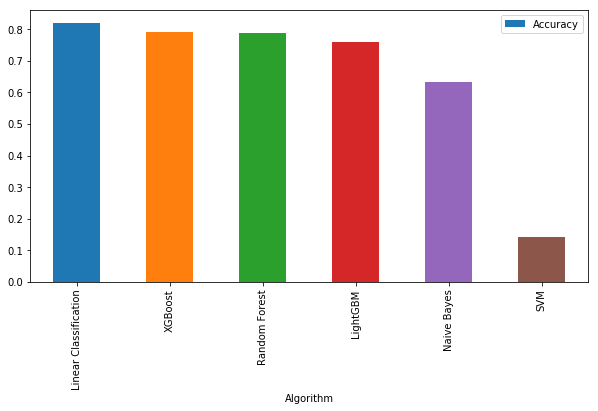

In [204]:
accuracy_df.sort_values('Accuracy', ascending=False).plot.bar(y='Accuracy', x='Algorithm', figsize=(10,5))

# Demo

In [2]:
import numpy as np
train_i = np.random.rand(len(tokenize_df)) <= 0.95

NameError: name 'tokenize_df' is not defined